<a href="https://colab.research.google.com/github/bindusri-c/CS-Projects/blob/main/IMDb_ml_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Datasets**

In [ ]:
import pandas as pd

# Load the movie data and critic review data
movies_df = pd.read_csv('rotten_tomatoes_movies.csv')
critic_reviews_df = pd.read_csv('rotten_tomatoes_critic_reviews.csv')

# Display the first few rows of each dataset to understand their structure
print("Movies Dataset")
print(movies_df.head())

print("\nReviews Dataset")
print(critic_reviews_df.head())

# Display the column names of each dataset
print("\nMovies Dataset Columns")
print(movies_df.columns)

print("\nReviews Dataset Columns")
print(critic_reviews_df.columns)


Movies Dataset
                    rotten_tomatoes_link  \
0                              m/0814255   
1                              m/0878835   
2                                   m/10   
3                 m/1000013-12_angry_men   
4  m/1000079-20000_leagues_under_the_sea   

                                         movie_title  \
0  Percy Jackson & the Olympians: The Lightning T...   
1                                        Please Give   
2                                                 10   
3                    12 Angry Men (Twelve Angry Men)   
4                       20,000 Leagues Under The Sea   

                                          movie_info  \
0  Always trouble-prone, the life of teenager Per...   
1  Kate (Catherine Keener) and her husband Alex (...   
2  A successful, middle-aged Hollywood songwriter...   
3  Following the closing arguments in a murder tr...   
4  In 1866, Professor Pierre M. Aronnax (Paul Luk...   

                                   critics_con

# ***Inspecting Missing Values in Movies dataset***

In [ ]:
# Check for missing values in the movies dataset
movies_missing = movies_df.isnull().sum()

# Check the general statistics of the dataset
movies_stats = movies_df.describe()

# Display the missing values and summary statistics
print("Missing Values:\n", movies_missing)
print("\nSummary Statistics:\n", movies_stats)



Missing Values:
 rotten_tomatoes_link                   0
movie_title                            0
movie_info                           321
critics_consensus                   8578
content_rating                         0
genres                                19
directors                            194
authors                             1542
actors                               352
original_release_date               1166
streaming_release_date               384
runtime                              314
production_company                   499
tomatometer_status                    44
tomatometer_rating                    44
tomatometer_count                     44
audience_status                      448
audience_rating                      296
audience_count                       297
tomatometer_top_critics_count          0
tomatometer_fresh_critics_count        0
tomatometer_rotten_critics_count       0
dtype: int64

Summary Statistics:
             runtime  tomatometer_rating  tomat

In [ ]:
movies_df['movie_info'] = movies_df['movie_info'].str.lower()
movies_df['movie_info'] = movies_df['movie_info'].str.replace(r"[^a-zA-Z0-9\s]", "", regex=True)


<font size="5">***Handling missing values for movie dataset***

In [ ]:
# Filling missing values for text columns with 'Unknown'
movies_df['movie_info'].fillna('Unknown', inplace=True)
movies_df['genres'].fillna('Unknown', inplace=True)
movies_df['directors'].fillna('Unknown', inplace=True)
movies_df['actors'].fillna('Unknown', inplace=True)

# Filling missing values for numeric columns with the median
movies_df['tomatometer_rating'].fillna(movies_df['tomatometer_rating'].median(), inplace=True)
movies_df['runtime'].fillna(movies_df['runtime'].median(), inplace=True)

# Dropping rows where 'movie_title' is missing (if any)
movies_df.dropna(subset=['movie_title'], inplace=True)

# Verify if the missing values are handled
movies_missing_after = movies_df.isnull().sum()

# Displaying the new missing values count
print("Missing Values After Handling:")
print(movies_missing_after)


Missing Values After Handling:
rotten_tomatoes_link                   0
movie_title                            0
movie_info                             0
critics_consensus                   8578
content_rating                         0
genres                                 0
directors                              0
authors                             1542
actors                                 0
original_release_date               1166
streaming_release_date               384
runtime                                0
production_company                   499
tomatometer_status                    44
tomatometer_rating                     0
tomatometer_count                     44
audience_status                      448
audience_rating                      296
audience_count                       297
tomatometer_top_critics_count          0
tomatometer_fresh_critics_count        0
tomatometer_rotten_critics_count       0
dtype: int64


In [ ]:

# Fill missing textual data
movies_df['critics_consensus'].fillna('No consensus', inplace=True)
movies_df['authors'].fillna('Unknown', inplace=True)
movies_df['production_company'].fillna('Unknown', inplace=True)
movies_df['tomatometer_status'].fillna('Unknown', inplace=True)
movies_df['audience_status'].fillna('Unknown', inplace=True)

# Handling missing dates by filling with the median date
median_release_date = pd.to_datetime(movies_df['original_release_date']).median()
median_streaming_date = pd.to_datetime(movies_df['streaming_release_date']).median()
movies_df['original_release_date'].fillna(median_release_date, inplace=True)
movies_df['streaming_release_date'].fillna(median_streaming_date, inplace=True)

# Filling numeric missing values with the median
for column in ['tomatometer_count', 'audience_rating', 'audience_count']:
    median_value = movies_df[column].median()
    movies_df[column].fillna(median_value, inplace=True)

# Check the updated missing values
print("Updated Missing Values:")
print(movies_df.isnull().sum())


Updated Missing Values:
rotten_tomatoes_link                0
movie_title                         0
movie_info                          0
critics_consensus                   0
content_rating                      0
genres                              0
directors                           0
authors                             0
actors                              0
original_release_date               0
streaming_release_date              0
runtime                             0
production_company                  0
tomatometer_status                  0
tomatometer_rating                  0
tomatometer_count                   0
audience_status                     0
audience_rating                     0
audience_count                      0
tomatometer_top_critics_count       0
tomatometer_fresh_critics_count     0
tomatometer_rotten_critics_count    0
dtype: int64


<font size="4">***Handle Extreme values***

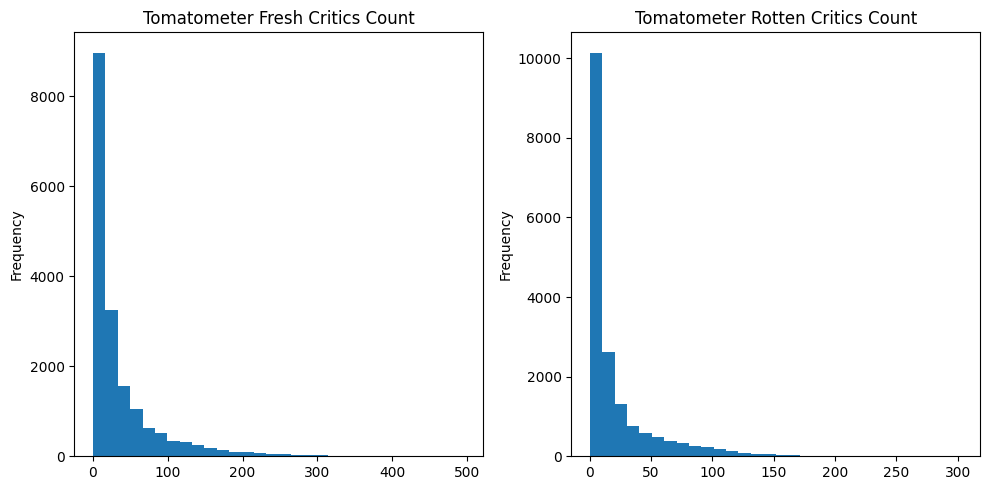

In [ ]:
import matplotlib.pyplot as plt

# Plotting histograms to visualize the distributions
plt.figure(figsize=(10, 5))

# Distribution of tomatometer_fresh_critics_count
plt.subplot(1, 2, 1)
movies_df['tomatometer_fresh_critics_count'].plot(kind='hist', bins=30, title='Tomatometer Fresh Critics Count')

# Distribution of tomatometer_rotten_critics_count
plt.subplot(1, 2, 2)
movies_df['tomatometer_rotten_critics_count'].plot(kind='hist', bins=30, title='Tomatometer Rotten Critics Count')

plt.tight_layout()
plt.show()
#the data is skewed


In [ ]:
# Step 1: Capping the outliers at the 95th percentile for both columns
fresh_critics_cap = movies_df['tomatometer_fresh_critics_count'].quantile(0.95)
rotten_critics_cap = movies_df['tomatometer_rotten_critics_count'].quantile(0.95)

# Apply the cap to both columns
movies_df['tomatometer_fresh_critics_count'] = movies_df['tomatometer_fresh_critics_count'].clip(upper=fresh_critics_cap)
movies_df['tomatometer_rotten_critics_count'] = movies_df['tomatometer_rotten_critics_count'].clip(upper=rotten_critics_cap)

# Step 2: Normalize the capped columns using Min-Max Scaling
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Select the columns to normalize
columns_to_normalize = ['tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count']

# Apply the scaler to normalize the selected columns
movies_df[columns_to_normalize] = scaler.fit_transform(movies_df[columns_to_normalize])

# Check the results to confirm normalization
movies_df[columns_to_normalize].describe()



,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
count,17712.000000,17712.000000
mean,0.227491,0.217514
std,0.273495,0.279850
min,0.000000,0.000000
25%,0.041379,0.034091
50%,0.110345,0.090909
75%,0.303448,0.272727
max,1.000000,1.000000


# ***Handling Missing values in critics dataset***

In [ ]:
reviews_missing = critic_reviews_df.isnull().sum()

# Check the general statistics of the dataset
reviews_stats = critic_reviews_df.describe()

# Display the missing values and summary statistics
print("Missing Values:\n", reviews_missing)
print("\nSummary Statistics:\n", reviews_stats)

Missing Values:
 rotten_tomatoes_link         0
critic_name              18529
top_critic                   0
publisher_name               0
review_type                  0
review_score            305936
review_date                  0
review_content           65806
dtype: int64

Summary Statistics:
                      rotten_tomatoes_link   critic_name top_critic  \
count                             1130017       1111488    1130017   
unique                              17712         11108          2   
top     m/star_wars_the_rise_of_skywalker  Emanuel Levy      False   
freq                                  992          8173     841481   

        publisher_name review_type review_score review_date  \
count          1130017     1130017       824081     1130017   
unique            2230           2          814        8015   
top     New York Times       Fresh          3/5  2000-01-01   
freq             13293      720210        90273       48019   

                 review_content  

# **Standardizing and normalizing review_scores bold text**

In [ ]:
import numpy as np
# Function to standardize review scores
def standardize_score(score):
    if pd.isna(score):
        return np.nan  # Handling missing values

    # Handling numerical scores (e.g., "4/10", "5/5")
    if '/' in str(score):
        try:
            num, denom = map(float, score.split('/'))
            if denom == 0:  # Check for zero denominator
                return np.nan  # Return NaN to avoid division by zero
            return num / denom  # Convert to a fraction
        except ValueError:
            return np.nan  # In case of conversion error

    # Handling letter grades
    grade_to_score = {
        'A+': 1.0, 'A': 0.95, 'A-': 0.9,
        'B+': 0.85, 'B': 0.8, 'B-': 0.75,
        'C+': 0.7, 'C': 0.65, 'C-': 0.6,
        'D+': 0.55, 'D': 0.5, 'D-': 0.45,
        'F': 0.0
    }
    return grade_to_score.get(score, np.nan)  # Map letter grades to scores or return NaN for unknown formats

# Apply the function to standardize scores
critic_reviews_df['review_score'] = critic_reviews_df['review_score'].apply(standardize_score)

# Fill missing standardized scores with the median
score_median = critic_reviews_df['review_score'].median()
critic_reviews_df['review_score'].fillna(score_median, inplace=True)

# Drop rows where review_content is missing (essential for sentiment analysis)
critic_reviews_df.dropna(subset=['review_content'], inplace=True)

# Convert review_date to datetime format
critic_reviews_df['review_date'] = pd.to_datetime(critic_reviews_df['review_date'])



In [ ]:
# Handling missing critic names
critic_reviews_df['critic_name'].fillna('Unknown', inplace=True)

# Dropping rows where review_content is missing
critic_reviews_df.dropna(subset=['review_content'], inplace=True)

# Ensure all operations have been carried out successfully
print("Updated Data Summary:")
print(critic_reviews_df.info())


Updated Data Summary:
<class 'pandas.core.frame.DataFrame'>
Index: 1064211 entries, 0 to 1130016
Data columns (total 8 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   rotten_tomatoes_link  1064211 non-null  object        
 1   critic_name           1064211 non-null  object        
 2   top_critic            1064211 non-null  bool          
 3   publisher_name        1064211 non-null  object        
 4   review_type           1064211 non-null  object        
 5   review_score          1064211 non-null  float64       
 6   review_date           1064211 non-null  datetime64[ns]
 7   review_content        1064211 non-null  object        
dtypes: bool(1), datetime64[ns](1), float64(1), object(5)
memory usage: 66.0+ MB
None


In [ ]:
critic_reviews_df['review_content'] = critic_reviews_df['review_content'].str.lower()
critic_reviews_df['review_content'] = critic_reviews_df['review_content'].str.replace(r"[^a-zA-Z\s]", "", regex=True)


# ***Movies aren't out until 1900 os anything before that is removed***


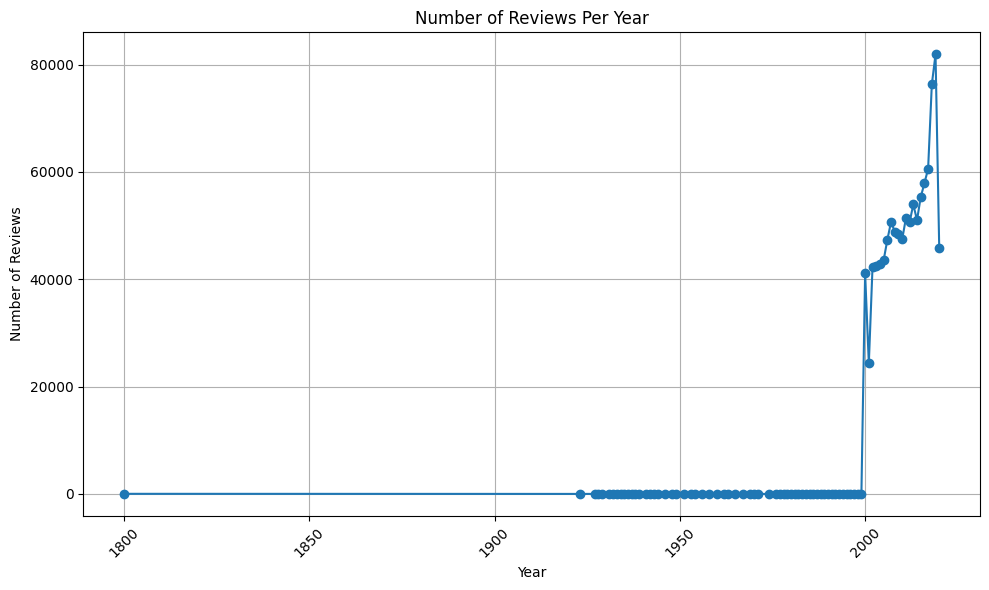

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'critic_reviews_df' is already loaded

# Counting reviews per year (based on 'review_date')
critic_reviews_df['review_date'] = pd.to_datetime(critic_reviews_df['review_date'])
reviews_per_year = critic_reviews_df['review_date'].dt.year.value_counts().sort_index()

# Plotting the line chart for reviews per year
plt.figure(figsize=(10, 6))
plt.plot(reviews_per_year.index, reviews_per_year.values, marker='o')
plt.title('Number of Reviews Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Display the chart
plt.show()


In [ ]:
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already done
nltk.download('stopwords')
stop = set(stopwords.words('english'))

# Remove stopwords
critic_reviews_df['review_content'] = critic_reviews_df['review_content'].apply(
    lambda x: " ".join([word for word in x.split() if word not in stop])
)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Initialize the tokenizer
tokenizer = Tokenizer()

# Fit the tokenizer on the review content
tokenizer.fit_on_texts(critic_reviews_df['review_content'])

# Convert texts to sequences (word indices)
sequences = tokenizer.texts_to_sequences(critic_reviews_df['review_content'])

# Padding the sequences to ensure uniform input size
from tensorflow.keras.preprocessing.sequence import pad_sequences

maxlen = 100  # You can adjust based on the dataset
padded_sequences = pad_sequences(sequences, maxlen=maxlen, padding='post')

# Check the result
print(padded_sequences[:5])


[[   321    238  13102   2990   2520    750    133   1030   1184    241
     153    204     95    528     93   1141    197    643      0      0
       0      0      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0      0      0      0]
 [  2405  11719  32070  62399  62400  20619   6037 113252   2816   4199
       3   3077  11075    321      0      0      0      0      0      0
       0      0      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0      0      

In [ ]:
from nltk.stem import WordNetLemmatizer

# Download WordNet
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

# Apply lemmatization
critic_reviews_df['review_content'] = critic_reviews_df['review_content'].apply(
    lambda x: " ".join([lemmatizer.lemmatize(word) for word in x.split()])
)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
critic_reviews_df.head()

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
0,m/0814255,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,2010-02-06,fantasy adventure fuse greek mythology contemp...
1,m/0814255,Louise Keller,False,Urban Cinefile,Fresh,NaN,2010-02-06,uma thurman medusa gorgon coiffure writhing sn...
2,m/0814255,NaN,False,FILMINK (Australia),Fresh,NaN,2010-02-09,topnotch cast dazzling special effect tide tee...
3,m/0814255,Ben McEachen,False,Sunday Mail (Australia),Fresh,NaN,2010-02-09,whether audience get behind lightning thief ha...
4,m/0814255,Ethan Alter,True,Hollywood Reporter,Rotten,NaN,2010-02-10,whats really lacking lightning thief genuine s...


**roBerta** Sentiment Analysis Code:

In [ ]:
from transformers import pipeline
import torch
import pandas as pd

# Check if GPU is available
device = 0 if torch.cuda.is_available() else -1

# Initialize the sentiment-analysis pipeline using a pre-trained RoBERTa sentiment model with GPU
classifier = pipeline('sentiment-analysis', model='cardiffnlp/twitter-roberta-base-sentiment', device=device)

# Clean the 'review_content' column to ensure it's non-null and a string
critic_reviews_df['review_content'] = critic_reviews_df['review_content'].astype(str).fillna('')

# Remove any rows where 'review_content' is empty or invalid
critic_reviews_clean = critic_reviews_df[critic_reviews_df['review_content'].str.strip().astype(bool)]

# Sample a portion of the dataset (adjust frac as needed, here it's 10%)
sample_df = critic_reviews_clean.sample(frac=0.1, random_state=42)

# Define the batch size (e.g., 500 reviews per batch)
batch_size = 500

# Create an empty list to store the sentiment results
all_sentiments = []

# Batch processing: Loop through the dataset in batches
for start in range(0, len(sample_df), batch_size):
    end = start + batch_size
    batch = sample_df['review_content'].iloc[start:end].tolist()  # Convert the batch of review content to a list of strings

    # Apply sentiment analysis to the batch
    batch_sentiments = classifier(batch)

    # Extract the sentiment label for each review in the batch
    batch_sentiments = [sentiment['label'] for sentiment in batch_sentiments]

    # Append the batch results to the list
    all_sentiments.extend(batch_sentiments)

    # Print progress after each batch
    print(f"Processed batch {start // batch_size + 1} of {len(sample_df) // batch_size + 1}")

# Add the sentiment results back to the sampled dataframe
sample_df['sentiment'] = all_sentiments

# Display the first few rows with sentiment
print(sample_df[['review_content', 'sentiment']].head())

# Optionally, save the results to a CSV file
sample_df.to_csv('critic_reviews_with_sentiment.csv', index=False)



/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Processed batch 1 of 227
Processed batch 2 of 227
Processed batch 3 of 227
Processed batch 4 of 227
Processed batch 5 of 227
Processed batch 6 of 227
Processed batch 7 of 227
Processed batch 8 of 227
Processed batch 9 of 227


You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


Processed batch 10 of 227
Processed batch 11 of 227
Processed batch 12 of 227
Processed batch 13 of 227
Processed batch 14 of 227
Processed batch 15 of 227
Processed batch 16 of 227
Processed batch 17 of 227
Processed batch 18 of 227
Processed batch 19 of 227
Processed batch 20 of 227
Processed batch 21 of 227
Processed batch 22 of 227
Processed batch 23 of 227
Processed batch 24 of 227
Processed batch 25 of 227
Processed batch 26 of 227
Processed batch 27 of 227
Processed batch 28 of 227
Processed batch 29 of 227
Processed batch 30 of 227
Processed batch 31 of 227
Processed batch 32 of 227
Processed batch 33 of 227
Processed batch 34 of 227
Processed batch 35 of 227
Processed batch 36 of 227
Processed batch 37 of 227
Processed batch 38 of 227
Processed batch 39 of 227
Processed batch 40 of 227
Processed batch 41 of 227
Processed batch 42 of 227
Processed batch 43 of 227
Processed batch 44 of 227
Processed batch 45 of 227
Processed batch 46 of 227
Processed batch 47 of 227
Processed ba

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Extract review content for keyword extraction
review_content = critic_reviews_df['review_content'].astype(str).tolist()

# Initialize the TF-IDF vectorizer
tfidf = TfidfVectorizer(max_features=10, stop_words='english')  # Extract top 10 keywords, excluding stopwords

# Fit and transform the review content to get TF-IDF matrix
tfidf_matrix = tfidf.fit_transform(review_content)

# Convert the TF-IDF matrix to an array and get feature names (the keywords)
feature_names = tfidf.get_feature_names_out()

# Function to extract top N keywords for each review based on their TF-IDF scores
def extract_top_keywords(tfidf_matrix, feature_names, top_n=5):
    top_keywords = []
    for row in tfidf_matrix:
        # Sort the indices of the row in descending order based on TF-IDF score
        sorted_indices = row.toarray()[0].argsort()[::-1][:top_n]
        # Get the corresponding feature names (keywords)
        keywords = [feature_names[i] for i in sorted_indices]
        top_keywords.append(keywords)
    return top_keywords

# Extract top 5 keywords for each review
critic_reviews_df['top_keywords'] = extract_top_keywords(tfidf_matrix, feature_names, top_n=5)

# Display the first few rows with the top keywords
critic_reviews_df[['review_content', 'top_keywords']].head()



,review_content,top_keywords
0,A fantasy adventure that fuses Greek mythology...,"[time, story, nan, movie, like]"
1,"Uma Thurman as Medusa, the gorgon with a coiff...","[time, story, nan, movie, like]"
2,With a top-notch cast and dazzling special eff...,"[time, story, nan, movie, like]"
3,Whether audiences will get behind The Lightnin...,"[time, story, nan, movie, like]"
4,What's really lacking in The Lightning Thief i...,"[time, story, nan, movie, like]"


In [ ]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Reduce the dataset size by sampling a smaller portion (e.g., 1% of reviews and movies)
critic_reviews_sample = critic_reviews_df.sample(frac=0.1, random_state=42)
movies_sample = movies_df.sample(frac=0.8, random_state=42)

# Limit the number of features to reduce processing time
tfidf = TfidfVectorizer(max_features=1000, stop_words='english')  # Reduce max_features for speed

# Fit the TF-IDF vectorizer on the combined text (both reviews and movies)
combined_text = critic_reviews_sample['review_content'].astype(str).tolist() + movies_sample['movie_info'].astype(str).tolist()
tfidf_matrix = tfidf.fit_transform(combined_text)

# Split the TF-IDF matrix back into reviews and movies
review_tfidf_matrix = tfidf_matrix[:len(critic_reviews_sample)]  # Reviews TF-IDF matrix
movie_tfidf_matrix = tfidf_matrix[len(critic_reviews_sample):]    # Movies TF-IDF matrix

# Reduce batch size for faster execution
batch_size = 500  # Reduce the batch size for quicker testing
recommendations = {}

# Iterate over the review matrix in batches
for start in range(0, review_tfidf_matrix.shape[0], batch_size):
    end = min(start + batch_size, review_tfidf_matrix.shape[0])

    # Get the current batch of reviews
    batch_review_matrix = review_tfidf_matrix[start:end]

    # Compute cosine similarity for the batch
    cosine_sim = cosine_similarity(batch_review_matrix, movie_tfidf_matrix)

    # For each review in the batch, get top 3 recommended movies (instead of 5 for faster testing)
    for idx, row in enumerate(cosine_sim):
        top_movie_indices = row.argsort()[-3:][::-1]  # Get indices of top 3 movies
        recommended_movies = movies_sample.iloc[top_movie_indices]['movie_title'].tolist()
        recommendations[critic_reviews_sample.iloc[start + idx]['review_content']] = recommended_movies
    print(start,"of",review_tfidf_matrix.shape[0])

# Display recommendations for the first few reviews
for review, recs in list(recommendations.items())[:5]:
    print(f"Review: {review[:100]}...")  # Display part of the review
    print(f"Recommended Movies: {recs}\n")



0 of 500
500 of 500
1000 of 500
1500 of 500
2000 of 500
2500 of 500
3000 of 500
3500 of 500
4000 of 500
4500 of 500
5000 of 500
5500 of 500
6000 of 500
6500 of 500
7000 of 500
7500 of 500
8000 of 500
8500 of 500
9000 of 500
9500 of 500
10000 of 500
10500 of 500
11000 of 500
11500 of 500
12000 of 500
12500 of 500
13000 of 500
13500 of 500
14000 of 500
14500 of 500
15000 of 500
15500 of 500
16000 of 500
16500 of 500
17000 of 500
17500 of 500
18000 of 500
18500 of 500
19000 of 500
19500 of 500
20000 of 500
20500 of 500
21000 of 500
21500 of 500
22000 of 500
22500 of 500
23000 of 500
23500 of 500
24000 of 500
24500 of 500
25000 of 500
25500 of 500
26000 of 500
26500 of 500
27000 of 500
27500 of 500
28000 of 500
28500 of 500
29000 of 500
29500 of 500
30000 of 500
30500 of 500
31000 of 500
31500 of 500
32000 of 500
32500 of 500
33000 of 500
33500 of 500
34000 of 500
34500 of 500
35000 of 500
35500 of 500
36000 of 500
36500 of 500
37000 of 500
37500 of 500
38000 of 500
38500 of 500
39000 of 5

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Dense, Dropout
from sklearn.metrics.pairwise import cosine_similarity

# We already have critic_reviews_sample and movies_sample created during RoBERTa step
# Hyperparameters
max_words = 10000  # Maximum number of words to keep in the vocabulary
max_len = 100  # Maximum length of sequences (reviews/movies)
embedding_dim = 100  # Dimension of word embeddings

# Combine the sampled reviews and movie descriptions for tokenization
combined_text = critic_reviews_sample['review_content'].astype(str).tolist() + movies_sample['movie_info'].astype(str).tolist()
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(combined_text)

# Tokenize and pad review content
review_sequences = tokenizer.texts_to_sequences(critic_reviews_sample['review_content'].astype(str))
review_data = pad_sequences(review_sequences, maxlen=max_len)

# Tokenize and pad movie descriptions
movie_sequences = tokenizer.texts_to_sequences(movies_sample['movie_info'].astype(str))
movie_data = pad_sequences(movie_sequences, maxlen=max_len)

# Split review data into training and testing sets
X_train, X_test = train_test_split(review_data, test_size=0.2, random_state=42)

# Build the LSTM-CNN model
model = Sequential()

# Embedding Layer
model.add(Embedding(max_words, embedding_dim, input_length=max_len))

# CNN Layer
model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

# LSTM Layer
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))

# Dense Layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Output Layer for embeddings (linear activation for representation learning)
model.add(Dense(max_len, activation='linear'))  # Output size matches max_len

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

# Train the model on review data
history = model.fit(X_train, X_train, epochs=3, batch_size=64, validation_split=0.2)

# Generate embeddings for both reviews and movie descriptions
review_embeddings = model.predict(review_data)
movie_embeddings = model.predict(movie_data)

# Compute cosine similarity between the review embeddings and movie embeddings
cosine_sim = cosine_similarity(review_embeddings, movie_embeddings)

# Recommend top N movies based on similarity
top_n = 5
recommendations = {}

# Loop through each review and find the top N most similar movies
for idx, row in enumerate(cosine_sim):
    top_movie_indices = row.argsort()[-top_n:][::-1]  # Get indices of top N most similar movies
    recommended_movies = movies_sample.iloc[top_movie_indices]['movie_title'].tolist()
    recommendations[critic_reviews_sample.iloc[idx]['review_content']] = recommended_movies

# Display recommendations for the first few reviews
for review, recs in list(recommendations.items())[:5]:
    print(f"Review: {review[:100]}...")  # Display part of the review
    print(f"Recommended Movies: {recs}\n")


Epoch 1/3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1130/1130 ━━━━━━━━━━━━━━━━━━━━ 59s 50ms/step - accuracy: 0.1426 - loss: 755692.1875 - val_accuracy: 0.1598 - val_loss: 664645.3750
Epoch 2/3
1130/1130 ━━━━━━━━━━━━━━━━━━━━ 56s 50ms/step - accuracy: 0.1608 - loss: 663540.5625 - val_accuracy: 0.1670 - val_loss: 628389.0625
Epoch 3/3
1130/1130 ━━━━━━━━━━━━━━━━━━━━ 57s 50ms/step - accuracy: 0.1288 - loss: 639179.6250 - val_accuracy: 0.1201 - val_loss: 611847.5625
3532/3532 ━━━━━━━━━━━━━━━━━━━━ 55s 16ms/step
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
Review: Smurftastically stupid. Here's a sequel to a movie we didn't care about the first time around. It's ...
Recommended Movies: ['Jug Face', 'Ouija', 'Homefront', "National Lampoon's Movie Madness", 'The Kid with a Bike']

Review: ...recognizes that it's okay to present scariness, gloominess and sadness, as long as you present st...
Recommended Movies: ['The Run of the Country', 'Down and Derby', 'The Good Life', 'Love Liza', "London's Finest (Hackney's Finest)"]

Review: It has its virtues --

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Assuming you already have review_embeddings and movie_embeddings generated for each model
# For example:
# review_embeddings (shape: num_reviews x embedding_dim)
# movie_embeddings (shape: num_movies x embedding_dim)

# k value for Precision@k and Recall@k
k = 15

# Function to calculate cosine similarity
def calculate_cosine_similarity(review_emb, movie_emb):
    return cosine_similarity(review_emb, movie_emb)

# Calculate similarity between each review and every movie
cosine_sim_matrix = calculate_cosine_similarity(review_embeddings, movie_embeddings)

# Threshold for determining "relevance" (higher threshold means stricter relevance)
relevance_threshold = 0.7

# Create pseudo ground truth based on cosine similarity
def get_relevant_movies(cosine_sim_row, threshold=relevance_threshold):
    relevant_indices = np.where(cosine_sim_row >= threshold)[0]
    return relevant_indices

# Precision@k function
def precision_at_k(recommended_movies_indices, relevant_movies_indices, k):
    recommended_top_k = recommended_movies_indices[:k]
    relevant = len(set(recommended_top_k).intersection(set(relevant_movies_indices)))
    return relevant / k

# Recall@k function
def recall_at_k(recommended_movies_indices, relevant_movies_indices, k):
    relevant = len(set(recommended_movies_indices[:k]).intersection(set(relevant_movies_indices)))
    return relevant / len(relevant_movies_indices) if len(relevant_movies_indices) > 0 else 0

# Loop through each review and calculate Precision@k and Recall@k
precision_scores = []
recall_scores = []

for review_idx in range(len(review_embeddings)):
    # Get the cosine similarity scores for this review with all movies
    cosine_sim_row = cosine_sim_matrix[review_idx]

    # Get the indices of movies sorted by similarity (descending order)
    sorted_movie_indices = np.argsort(cosine_sim_row)[::-1]

    # Get the relevant movies based on the threshold
    relevant_movies_indices = get_relevant_movies(cosine_sim_row, threshold=relevance_threshold)

    # Calculate precision and recall at k
    precision = precision_at_k(sorted_movie_indices, relevant_movies_indices, k)
    recall = recall_at_k(sorted_movie_indices, relevant_movies_indices, k)

    precision_scores.append(precision)
    recall_scores.append(recall)

# Calculate the average Precision@k and Recall@k
average_precision = np.mean(precision_scores)
average_recall = np.mean(recall_scores)

print(f"Average Precision@{k}: {average_precision:.2f}")
print(f"Average Recall@{k}: {average_recall:.2f}")


Average Precision@15: 0.94
Average Recall@15: 0.01


Embedding Visualization with t-SNE:

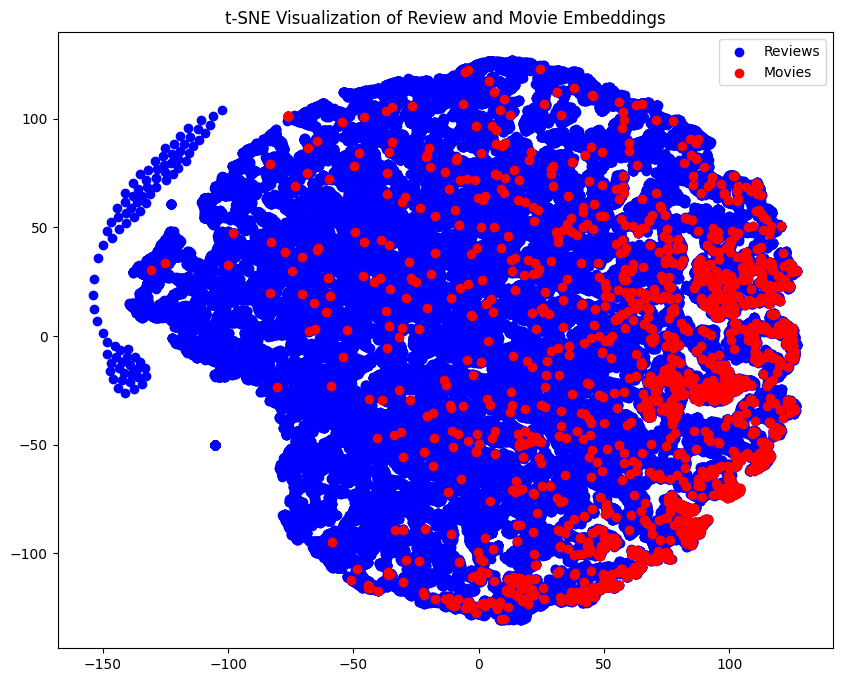

In [ ]:
from sklearn.manifold import TSNE

# Stack the review and movie embeddings together for t-SNE
combined_embeddings = np.vstack((review_embeddings, movie_embeddings))

# Apply t-SNE to reduce the dimensionality to 2D
tsne = TSNE(n_components=2, random_state=42)
tsne_embeddings = tsne.fit_transform(combined_embeddings)

# Plot the t-SNE results
plt.figure(figsize=(10, 8))

# Plot the review embeddings (first len(review_embeddings))
plt.scatter(tsne_embeddings[:len(review_embeddings), 0], tsne_embeddings[:len(review_embeddings), 1], c='blue', label='Reviews')

# Plot the movie embeddings (after len(review_embeddings))
plt.scatter(tsne_embeddings[len(review_embeddings):, 0], tsne_embeddings[len(review_embeddings):, 1], c='red', label='Movies')

plt.title("t-SNE Visualization of Review and Movie Embeddings")
plt.legend()
plt.show()



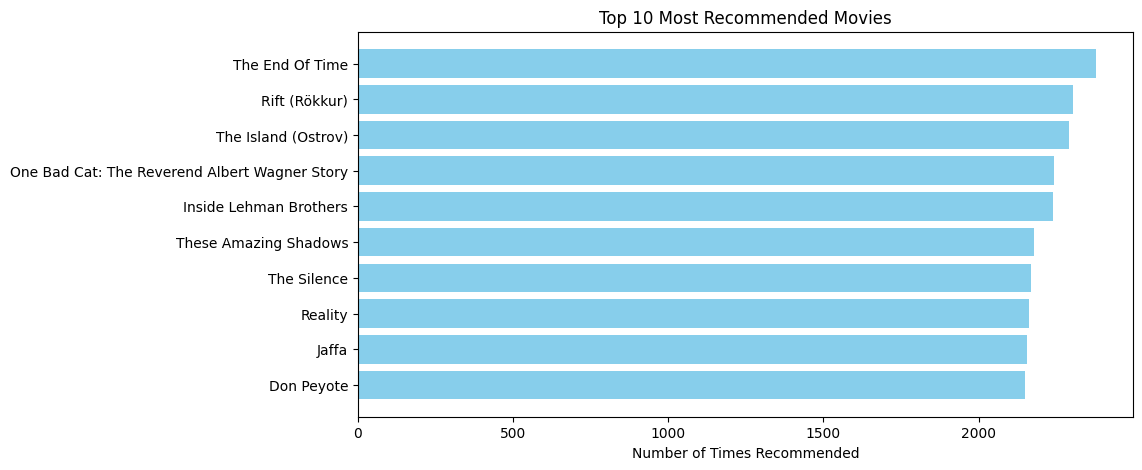

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

# Assuming 'recommendations' is a dictionary with reviews as keys and recommended movie lists as values
all_recommendations = [movie for recs in recommendations.values() for movie in recs]

# Count the frequency of each movie being recommended
movie_counts = Counter(all_recommendations)

# Create a bar plot for the top 10 most recommended movies
most_common_movies = movie_counts.most_common(10)

movies, counts = zip(*most_common_movies)
plt.figure(figsize=(10, 5))
plt.barh(movies, counts, color='skyblue')
plt.xlabel('Number of Times Recommended')
plt.title('Top 10 Most Recommended Movies')
plt.gca().invert_yaxis()
plt.show()


In [ ]:
from transformers import BertTokenizer, BertModel
import torch
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Load pre-trained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Function to get BERT embeddings for a list of texts
def get_bert_embeddings(text_list):
    embeddings = []
    for text in text_list:
        inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True, max_length=512)
        with torch.no_grad():
            outputs = model(**inputs)
        # Extract the hidden state for the [CLS] token (representative of the whole sentence)
        cls_embedding = outputs.last_hidden_state[:, 0, :].numpy()
        embeddings.append(cls_embedding)
    return np.vstack(embeddings)

# Get BERT embeddings for review content and movie descriptions
review_embeddings = get_bert_embeddings(critic_reviews_sample['review_content'].astype(str).tolist())
movie_embeddings = get_bert_embeddings(movies_sample['movie_info'].astype(str).tolist())

# Compute cosine similarity between review embeddings and movie embeddings
cosine_sim = cosine_similarity(review_embeddings, movie_embeddings)

# Recommend top N movies based on similarity
top_n = 5
recommendations = {}

# Loop through each review and find the top N most similar movies
import numpy as np

def get_diverse_recommendations(cosine_sim_row, top_n=5, diversity_factor=0.2):
    # Get the indices of the top N most similar movies
    top_movie_indices = cosine_sim_row.argsort()[-top_n:][::-1]

    # Introduce diversity by adding some random selection
    random_sample_size = int(top_n * diversity_factor)
    additional_movie_indices = np.random.choice(len(cosine_sim_row), random_sample_size, replace=False)

    # Combine the most similar and randomly selected movies
    final_recommendations = np.unique(np.concatenate((top_movie_indices, additional_movie_indices)))
    return final_recommendations[:top_n]

# Replace the original recommendation logic with the diverse recommendations
for idx, row in enumerate(cosine_sim):
    diverse_movie_indices = get_diverse_recommendations(row, top_n=5, diversity_factor=0.2)
    recommended_movies = movies_sample.iloc[diverse_movie_indices]['movie_title'].tolist()
    recommendations[critic_reviews_sample.iloc[idx]['review_content']] = recommended_movies


# Display recommendations for the first few reviews
for review, recs in list(recommendations.items())[:5]:
    print(f"Review: {review[:]}")  # Display part of the review
    print(f"Recommended Movies: {recs}\n")


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Review: Smurftastically stupid. Here's a sequel to a movie we didn't care about the first time around. It's enough to make you blue.
Recommended Movies: ['One Bad Cat: The Reverend Albert Wagner Story', 'The High and the Mighty', 'A Long Way Down', 'Spree', "A Midsummer Night's Dream"]

Review: ...recognizes that it's okay to present scariness, gloominess and sadness, as long as you present strong, pure hearted children whose inherent cleverness cuts through it all.
Recommended Movies: ['Greenfingers', 'The Gleaners and I', 'Beyond the Mat', 'Barry Lyndon', 'Sordid Lives']

Review: It has its virtues -- Wenders is a skilled and thoughtful workman -- but hovers somewhere between a thriller and an art-house movie and won't fully satisfy fans of either.
Recommended Movies: ['One Bad Cat: The Reverend Albert Wagner Story', 'Greenfingers', 'Gloria Bell', 'Butch Cassidy and the Sundance Kid', 'Barry Lyndon']

Review: The lead actors are basically unknown to American audiences and so are easi

Embedding Visualization with t-SNE:

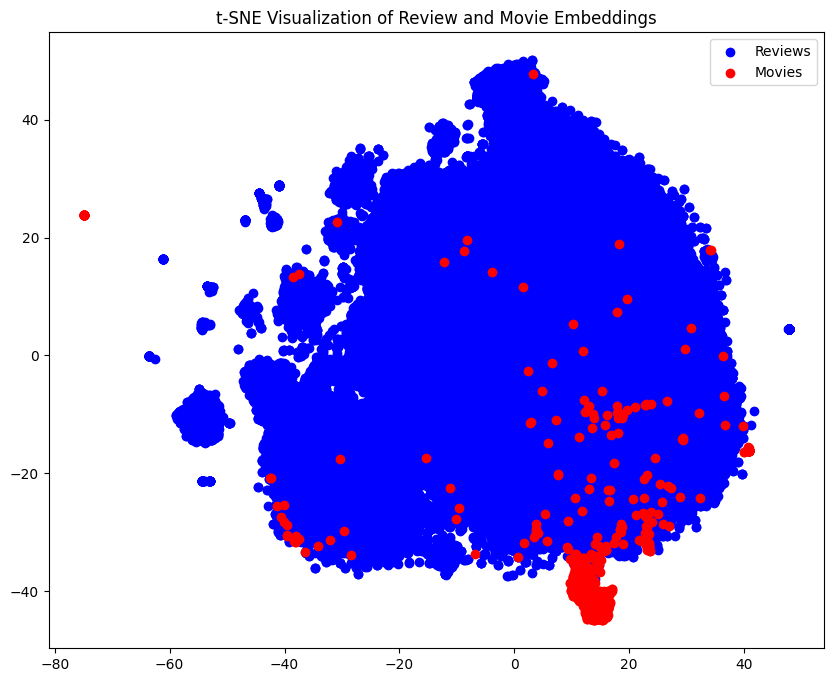

In [ ]:
from sklearn.manifold import TSNE

# Stack the review and movie embeddings together for t-SNE
combined_embeddings = np.vstack((review_embeddings, movie_embeddings))

# Apply t-SNE to reduce the dimensionality to 2D
tsne = TSNE(n_components=2, random_state=42)
tsne_embeddings = tsne.fit_transform(combined_embeddings)

# Plot the t-SNE results
plt.figure(figsize=(10, 8))

# Plot the review embeddings (first len(review_embeddings))
plt.scatter(tsne_embeddings[:len(review_embeddings), 0], tsne_embeddings[:len(review_embeddings), 1], c='blue', label='Reviews')

# Plot the movie embeddings (after len(review_embeddings))
plt.scatter(tsne_embeddings[len(review_embeddings):, 0], tsne_embeddings[len(review_embeddings):, 1], c='red', label='Movies')

plt.title("t-SNE Visualization of Review and Movie Embeddings")
plt.legend()
plt.show()



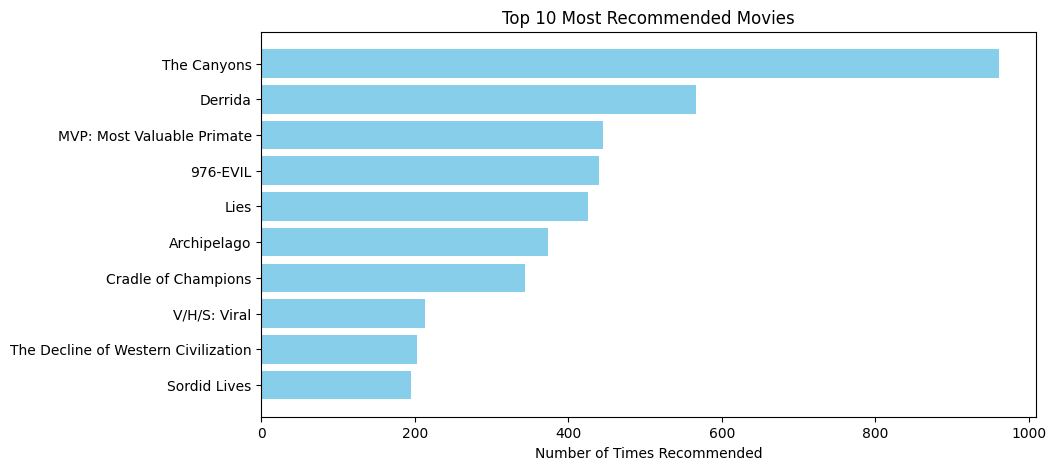

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

# Assuming 'recommendations' is a dictionary with reviews as keys and recommended movie lists as values
all_recommendations = [movie for recs in recommendations.values() for movie in recs]

# Count the frequency of each movie being recommended
movie_counts = Counter(all_recommendations)

# Create a bar plot for the top 10 most recommended movies
most_common_movies = movie_counts.most_common(10)

movies, counts = zip(*most_common_movies)
plt.figure(figsize=(10, 5))
plt.barh(movies, counts, color='skyblue')
plt.xlabel('Number of Times Recommended')
plt.title('Top 10 Most Recommended Movies')
plt.gca().invert_yaxis()
plt.show()
